# Failure Analysis

## Objective

The goal of this analysis is to identify patterns in equipment failures to support decision-making regarding decommissioning and maintenance strategies. Specifically, we aim to:

- **Failure by Age Analysis**: Determine at which point in the equipment's lifecycle failures are most likely to occur.
- **Failure Frequency and Trend Analysis**: Identify equipment models with the highest number of failures in recent periods or those showing an increasing failure trend.
- **Repair Cost Analysis (Ratio Analysis)**: Evaluate the amount spent on repairs for different models and individual equipment to identify cases where repair costs exceed the initial purchase price.

These insights will help determine the optimal time to retire equipment, detect failing models and specific units, and improve overall asset management strategies.

## Executive Summary

- A total of **172 devices** were identified with repair costs exceeding their original purchase value, highlighting the need for urgent evaluation.
- **Over 15 equipment models** consistently show **100% failure rates** and/or **high repair counts**, often related to aging but also seen in surprisingly young devices.
- Several models exhibited **more than one repair per unit per year**, indicating systemic or design issues.
- **Repair cost does not always correlate with age**: multiple newer models incurred disproportionately high maintenance expenses.
- **One specific model** reached **over 290% of its original cost in repairs**, suggesting it is no longer cost-effective to maintain.
- **75% of corrective orders had no cost associated**, pointing to potential user errors or a lack of proper training.
- Certain equipment types appeared repeatedly among the most problematic models, indicating **type-level vulnerabilities**.
- These findings support a targeted strategy for **equipment replacement, user training, and contract or design reassessment** to optimize hospital maintenance budgets.


## Part 1: Load DataFrames and Import Libraries

In [2]:
%load_ext autoreload
%autoreload 2

import importlib
import pandas as pd 
import FunctionsFailureAnallysis as f
import os
from tabulate import tabulate
importlib.reload(f)

<module 'FunctionsFailureAnallysis' from 'c:\\Users\\frano\\Desktop\\Practica DA\\Swiss_PARA_MI\\Final_Swiss\\Power BI - Limpieza SAP\\FailureAnalysis\\FunctionsFailureAnallysis.py'>

In [3]:
# Define the folder where the files are located
folder_name = "DF_cleaned"

# List of base names for the DataFrames
df_names = {
    "df_equipment",
    "df_orders",
    "df_equipment_decomission_request",
    "df_storage",
    "df_orders_all"
}

# Dynamically load the DataFrames and assign them as individual variables

for name in df_names:
    file_path = os.path.join("../",folder_name, f"{name}.csv")
    globals()[name] = pd.read_csv(file_path)

print("File loading completed.")


File loading completed.


In [4]:
import os
import pandas as pd

# Go up one level and into the SAPCleaning/DF_Remove1 folder
folder_name = os.path.join("..", "SAPCleaning", "DF_Remove1")

# List of DataFrame base names to load
df_names = ["df_recommendation_remove"]

# Load each CSV file into a variable with its corResponsibleonding name
for name in df_names:
    file_path = os.path.join(folder_name, f"{name}.csv")
    globals()[name] = pd.read_csv(file_path)

print("File loading completed.")


File loading completed.


## Part 2: Filter the DataFrame for Analysis

I will create a separate DataFrame filtering out the equipment that I previously recommended for decommissioning.

The full equipment DataFrame will be useful for identifying failure patterns, while the filtered one will help detect failing equipment that has not been recommended for decommissioning.

In [5]:
df_equipment_without_deco = df_equipment[~df_equipment["Equipment_ID"].isin(df_recommendation_remove["Equipment_ID"].unique())]


## Part 3: Order type and quantity analysis

### Part 3.b: Order trends

In [6]:
df_orders.columns

Index(['Class', 'Year', 'Equipment_ID', 'Cost', 'Dia', 'Valor',
       'Dollar_day_price', 'Cost_in_dollar', 'OrderWithRepair',
       'Last_order_year', 'Purchase_year', 'Equipment_age'],
      dtype='object')

For this analysis, we are going to use the information from all orders, whether or not they are associated with active equipment.

For this analysis, we are going to use the information from all orders, whether or not they are associated with active equipment.

Orders are classified based on their code as follows:

- **ICOR**: Corrective maintenance  
- **IABN**: Outsourced service (abono)  
- **IPRV**: Preventive maintenance


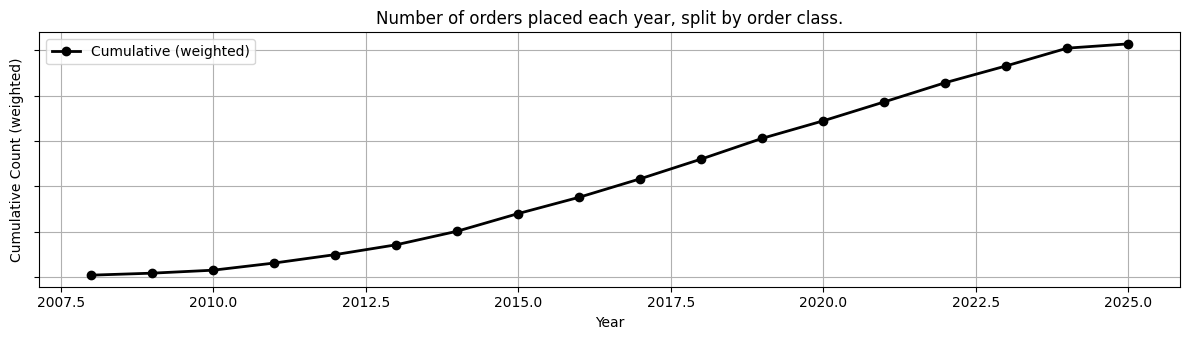

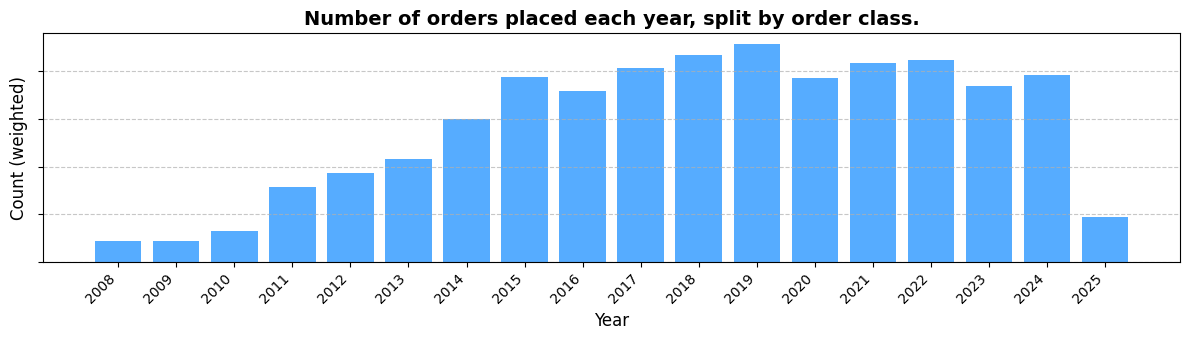

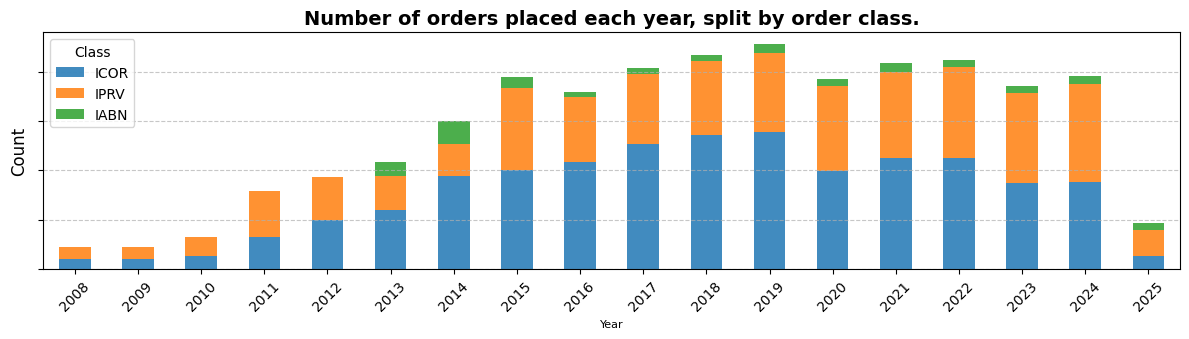

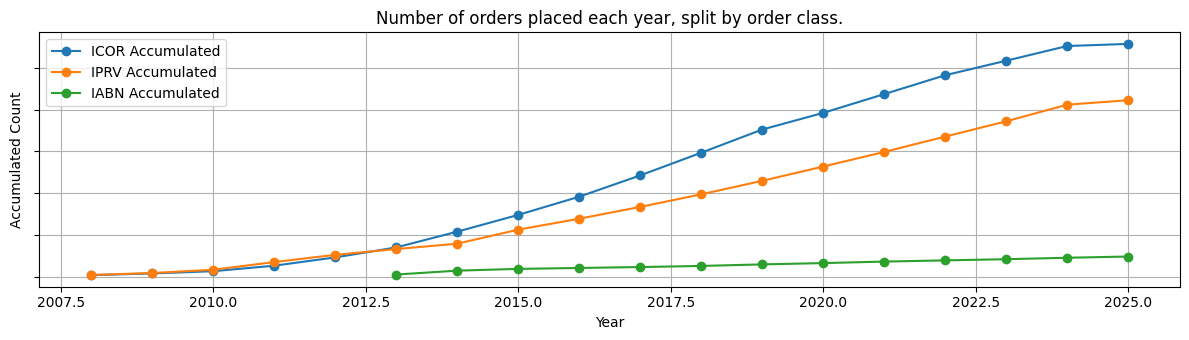

In [11]:
f.analyze_data(df_orders_all, 'Year', metric='count', split_by_class=True, title="Number of orders placed each year, split by order class.")


We see that the majority of the orders are ICOR (corrective maintenance) and IPRV (preventive maintenance). Let's take a closer look at the percentage of each order class.

In [8]:
# Count the occurrences of each order class
Class_counts = df_orders_all["Class"].value_counts()
total_orders = Class_counts.sum()

# Calculate percentages
Class_percentages = (Class_counts / total_orders) * 100

# Print results in a formatted way
print("=" * 50)
print(f"📊 **Order Class Frequency Analysis**")
print("=" * 50)
print(f"📌 Breakdown by class:\n")

for Class, count in Class_counts.items():
    percentage = Class_percentages[Class]
    print(f"🔹 {Class}: orders ({percentage:.2f}%)")

print("=" * 50)


📊 **Order Class Frequency Analysis**
📌 Breakdown by class:

🔹 ICOR: orders (54.18%)
🔹 IPRV: orders (41.09%)
🔹 IABN: orders (4.73%)


This confirms that ICOR and IPRV account for the majority of orders, making up almost 95% of the total. However, we will focus more on ICOR, as these are the ones we aim to reduce.

### 3.C Correctives order in time

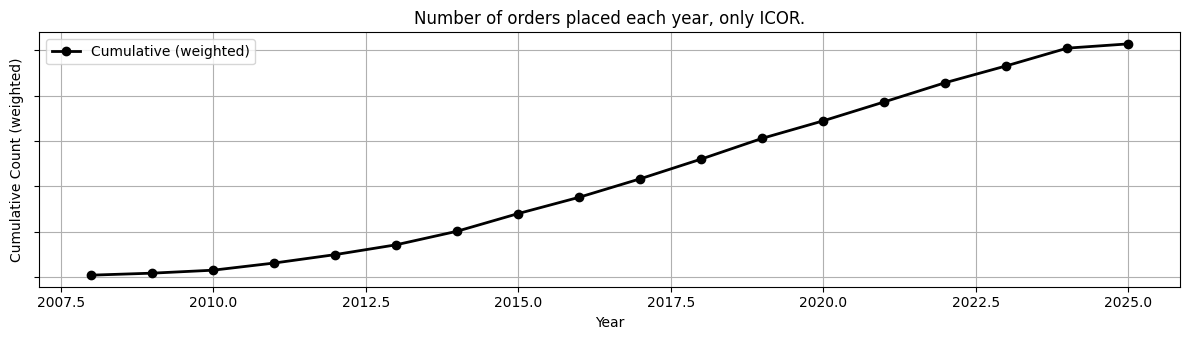

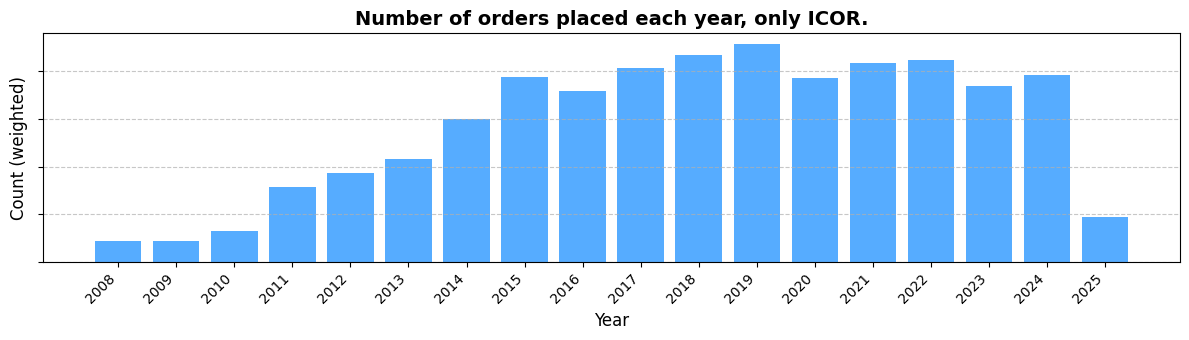

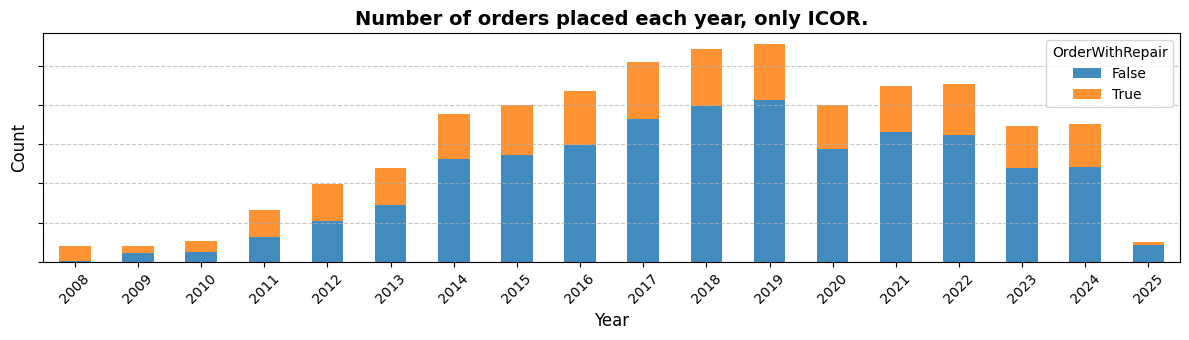

In [9]:
f.analyze_data(df_orders_all, 'Year', metric='count', split_by_class=False, classes=["ICOR"], title="Number of orders placed each year, only ICOR.")


Focusing on the ICOR, a decrease in the number of corrective orders between 2019 and 2020 is evident. This can be partially explained by the impact of the pandemic, which reduced equipment activity in certain hospital areas, but it could also indicate that prior investment in equipment had a positive effect on reducing failures.

Looking at the last graph, we can see that the majority of corrective orders do not involve a repair.

In [36]:
# Count the number of orders with and without repair costs
orders_with_repair = df_orders[df_orders["Cost"] > 0].shape[0]
orders_without_repair = df_orders[df_orders["Cost"] == 0].shape[0]
total_orders = df_orders.shape[0]

# Calculate percentages
percentage_with_repair = (orders_with_repair / total_orders) * 100
percentage_without_repair = (orders_without_repair / total_orders) * 100

# Print the results in a nicely formatted way
print("=" * 50)
print(f"📊 **Order Repair Cost Analysis**")
print("=" * 50)
print(f"✅ Orders with repair cost: {percentage_with_repair:.2f}%")
print(f"❌ Orders without repair cost: {percentage_without_repair:.2f}%")
print("=" * 50)
print("📝 Most of the orders without a repair cost are likely user errors.")

📊 **Order Repair Cost Analysis**
✅ Orders with repair cost: 26.79%
❌ Orders without repair cost: 73.21%
📝 Most of the orders without a repair cost are likely user errors.


Only 25% of corrective orders have an associated cost, suggesting a potential lack of user training.  

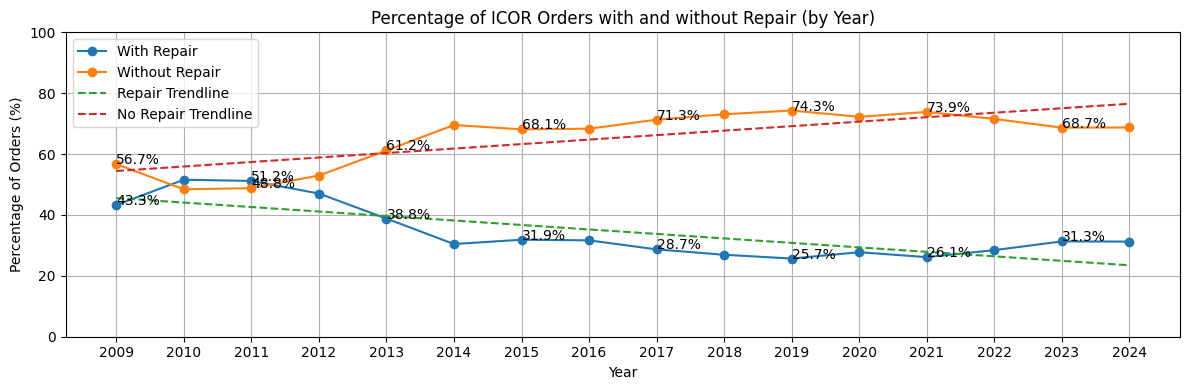

In [37]:
f.plot_icor_repair_percentage(df_orders, plot_type="year",show_trendline=True) 


### 3.D: Cost per type of order

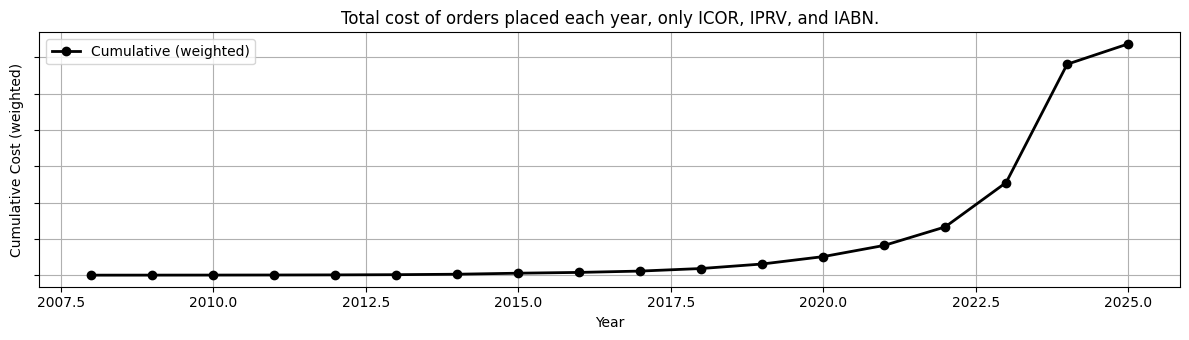

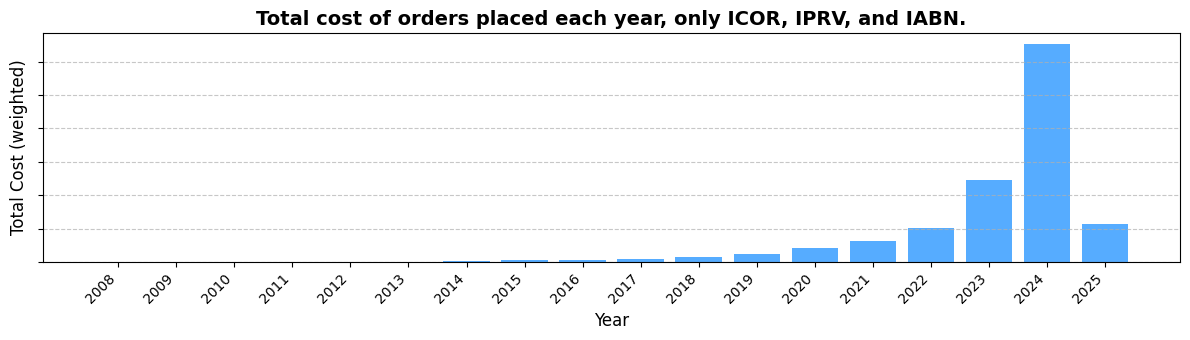

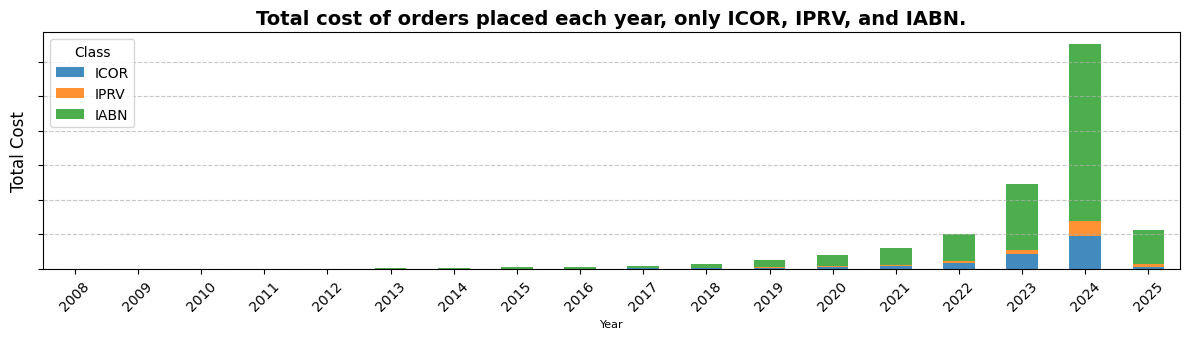

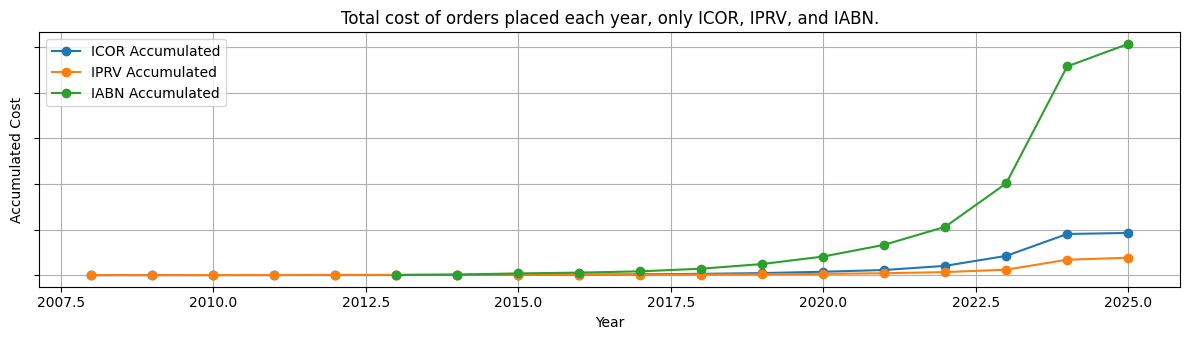

In [10]:
f.analyze_data(df_orders, 'Year', metric='sum', split_by_class=True, classes=["ICOR", "IPRV", "IABN"], title="Total cost of orders placed each year, only ICOR, IPRV, and IABN.")

We can see how IABN have grown from 2012 to 2022

We can see that, although IABN represents a small portion of the total orders, it accounts for the majority of the total cost.

In [39]:
# Calculate total cost per order class
Class_costs = df_orders.groupby("Class")["Cost"].sum()

# Calculate total cost of all orders
total_cost = Class_costs.sum()

# Compute percentage contribution of each order class
Class_percentages = (Class_costs / total_cost) * 100

# Print the formatted results
print("=" * 50)
print(f"📊 **Cost Distribution by Order Class**")
print("=" * 50)
print(f"📌 Breakdown by class:\n")

for Class, cost in Class_costs.items():
    percentage = Class_percentages[Class]
    print(f"🔹 {Class}: { percentage:.2f}%")

print("=" * 50)
print("📝 Even though some classes have fewer orders, they may have a significantly higher total cost.")


📊 **Cost Distribution by Order Class**
📌 Breakdown by class:

🔹 IABN: 79.49%
🔹 ICOR: 14.51%
🔹 IPRV: 6.00%
📝 Even though some classes have fewer orders, they may have a significantly higher total cost.


We see that, despite IABN accounting for only 5% of the total orders, it represents nearly 80% of the total cost. Let's now analyze the case of ICOR

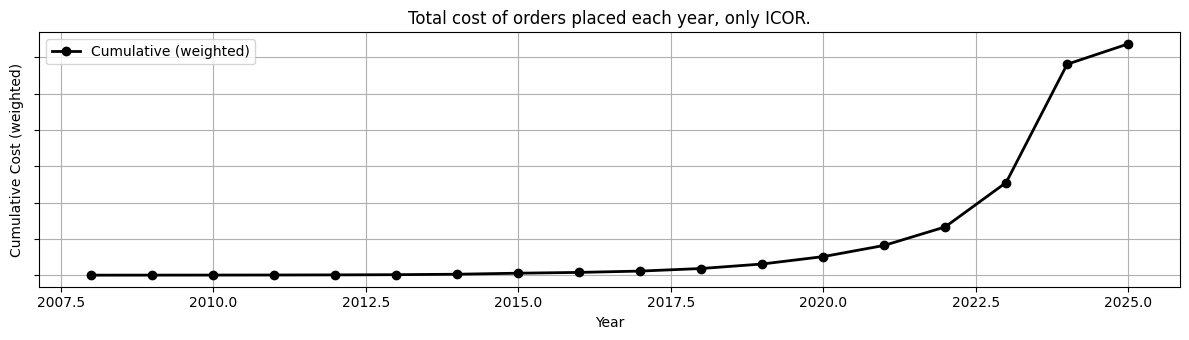

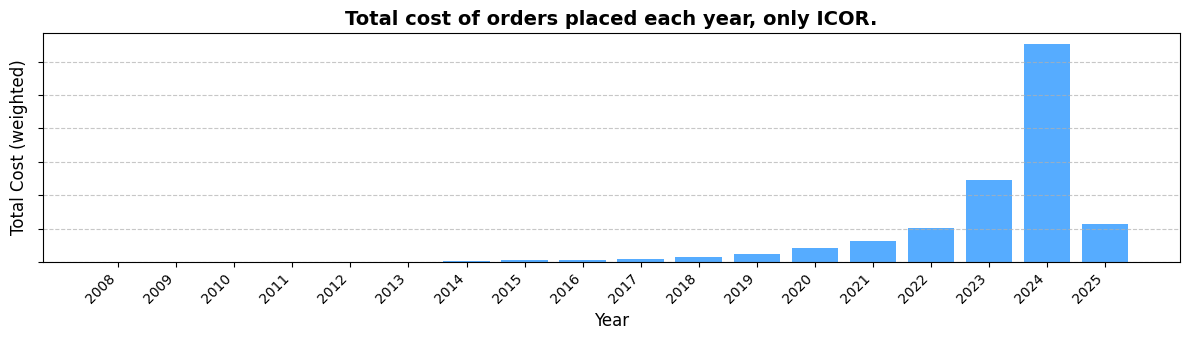

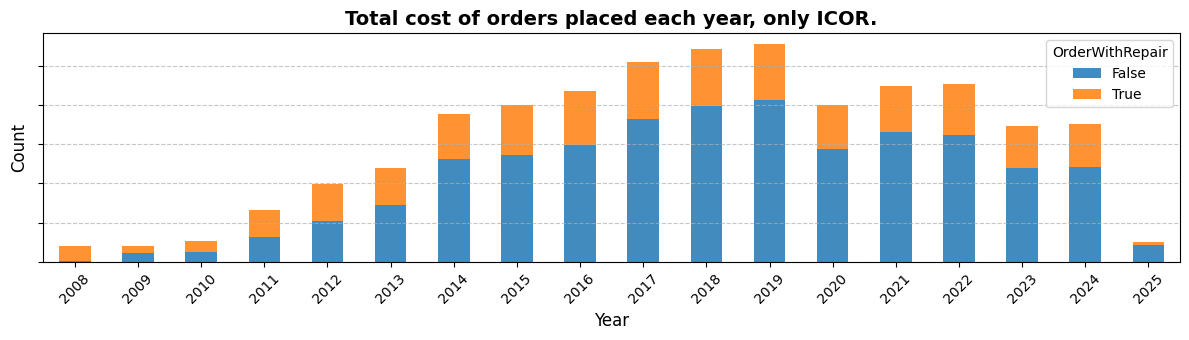

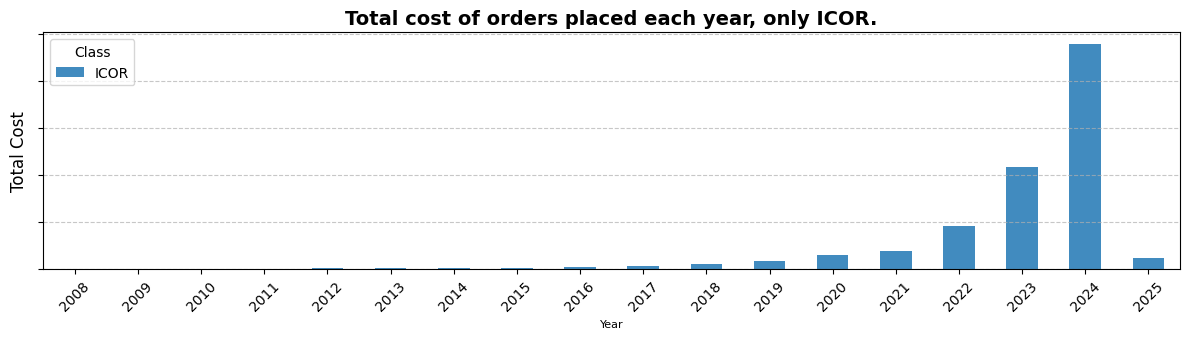

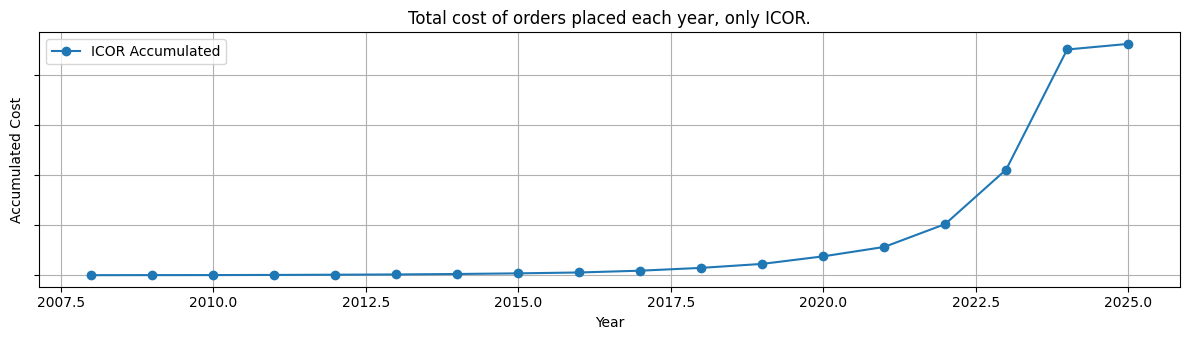

In [40]:
f.analyze_data(df_orders, 'Year', metric='sum', split_by_class=True, classes=["ICOR"], title="Total cost of orders placed each year, only ICOR.")

when analyzing only the costs of corrective orders, it is observed that despite a decrease in the number of corrective orders, the total repair cost has increased. This could be due to the lack of investment in new equipment, which forces more expensive repairs on obsolete equipment.

## Part 4: Failure by Age Analysis

### 4-A: Analysis by Age and order quantity

In this section, we aim to determine at which stage of the equipment's lifecycle failures are most likely to occur.  

The following chart displays the number of service orders for equipment based on its age at the time of the order. It also differentiates whether the equipment had an associated cost at the time of the order, allowing us to distinguish between failure-related orders and those more associated with regular usage.

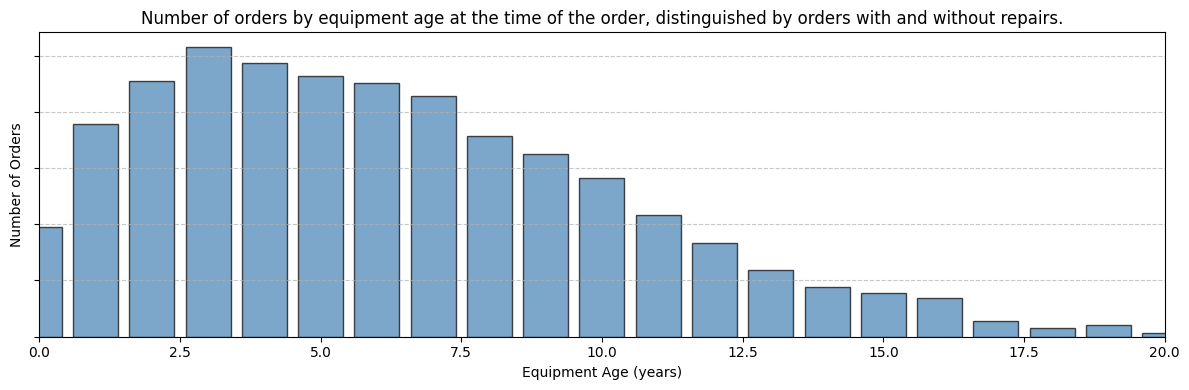

In [41]:
fig, ax = f.combined_analysis_plot(
    df_equipment, 
    df_orders, 
    weighted=False,
    metric='count',
    stacked_by_class=False,
    repair_option="yes",
    title="Number of orders by equipment age at the time of the order, distinguished by orders with and without repairs.",
)


This chart has a limitation: it does not account for the number of available equipment at each age. Let's adjust for that and lets see only ICOR

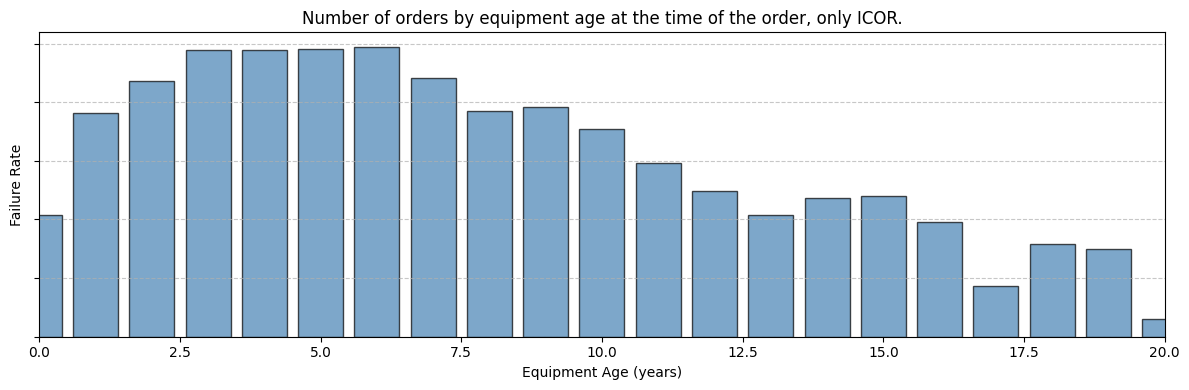

In [13]:
fig, ax = f.combined_analysis_plot(
    df_equipment, 
    df_orders, 
    order_class="ICOR",         # All Classs
    weighted=True,
    metric='count',
    stacked_by_class=False,
    repair_option="yes",
    title="Number of orders by equipment age at the time of the order, only ICOR.",
)


 We see that the trend remains the same, with the majority of orders being in the years 3-6.

### 4-B: Age and Cost


Now, we want to analyze whether the cost of repairs remains the same throughout the equipment's lifecycle.

Looking only at corrective cases and weighting by the number of devices, we see a peak at year 6, followed by steady growth until year 12, with two major peaks at years 16 and 19.

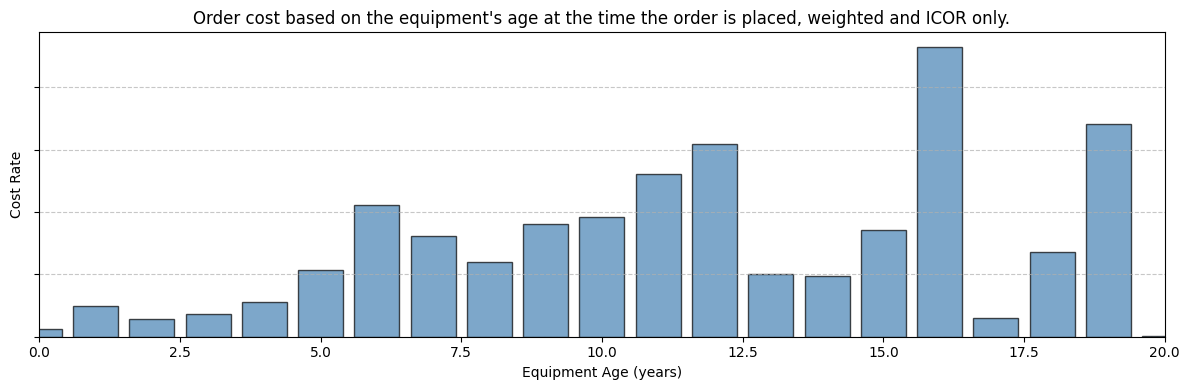

In [14]:
fig, ax = f.combined_analysis_plot(
    df_equipment, 
    df_orders, 
    order_class="ICOR",         
    weighted=True,
    metric='cost',
    stacked_by_class=False,
    title="Order cost based on the equipment's age at the time the order is placed, weighted and ICOR only."
)


## Part 5: Ratio Analysis for individual equipments

Now, we aim to identify the equipment and models whose repair expenses have already exceeded their total cost, only in corrective maintance. For this analysis, we will once again filter out the equipment that was previously recommended for decommissioning.

Total number of equipment above the line: 172


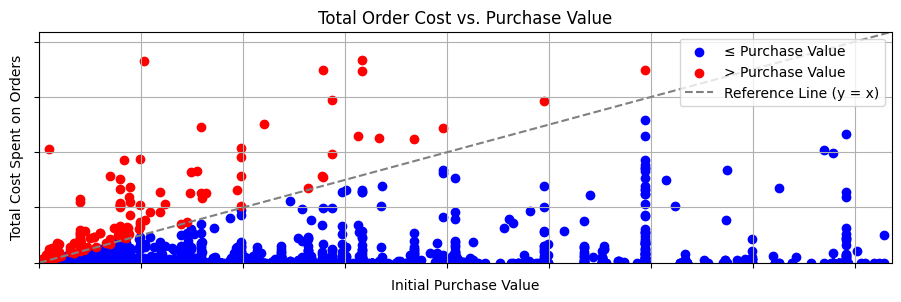

In [16]:
df_orders_ICOR = df_orders[df_orders["Class"] == "ICOR"].copy()
df_result = f.compare_costs_vs_purchase_value_filtered(df_equipment_without_deco, df_orders_ICOR)



We see that there are 172 pieces of equipment that fit this criterion, let's deep dive into them

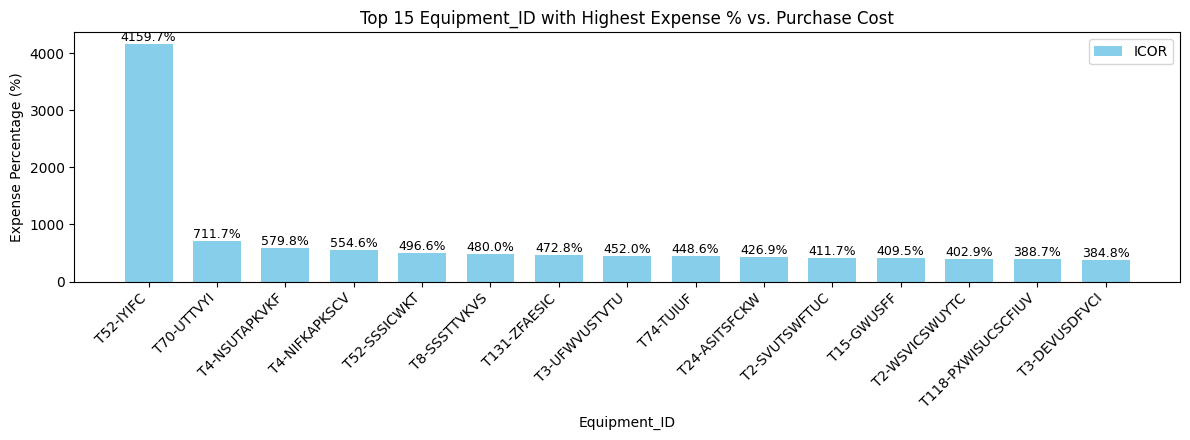


Final Table:
+--------+----------------+---------+--------------------+-----------+---------+
| Type   | Manufacturer   | Model   | Equipment_ID       |   Repairs |   Ratio |
|--------+----------------+---------+--------------------+-----------+---------|
| T52    | F157           | M107    | T52-IYIFC          |      1    |  4159.7 |
| T70    | F18            | M1745   | T70-UTTVYI         |      2    |   711.7 |
| T4     | F6             | M11     | T4-NSUTAPKVKF      |      5    |   579.8 |
| T4     | F6             | M11     | T4-NIFKAPKSCV      |      1    |   554.6 |
| T52    | F80            | M107    | T52-SSSICWKT       |      10   |   496.6 |
| T8     | F41            | M1382   | T8-SSSTTVKVS       |      2    |   480   |
| T131   | F43            | M1252   | T131-ZFAESIC       |      87   |   472.8 |
| T3     | F7             | M21     | T3-UFWVUSTVTU      |      2    |   452   |
| T74    | F4             | M215    | T74-TUIUF          |      5    |   448.6 |
| T24    | F13

In [45]:
a = f.plot_top_expense_percentage_vs_purchase_cost(
    df_equipment[df_equipment["Equipment_ID"].isin(df_result["Equipment_ID"])],
    df_orders, 
    top_n=15, 
    min_equipment=5, 
    order_type="ICOR",
    min_purchase_value=0
)


### Analysis of Equipment with Excessive Repair Costs

Based on the table of equipment with the highest repair-to-purchase cost ratios, the following points are highlighted:

- The equipment with the most extreme cost ratio is **T52-IYIFC**, reaching **4159.7%**, imeaning that repair costs exceeded the purchase value by over 40 times.
- Other equipment such as **T70-UTTVYI**, **T4-NSUTAPKVKF**, and **T4-NIFKAPKSCV** also show ratios above **500%**, suggesting disproportionately high maintenance expenses.
- Devices like **T4-NSUTAPKVKF** and **T4-NIFKAPKSCV** share the same model and manufacturer, potentially revealing recurring issues in that product line.
- The equipment **T131-ZFAESIC** underwent **87 repairs**, while others such as T52-IYIFC or T118-PXWISUSCSFIUV reached high ratios with **only 1–2 repairs**, suggesting either high cost per intervention or an unusually low purchase price.
- The presence of multiple manufacturers and models shows that high maintenance burden is **not limited to a single vendor or equipment type**, despite identifiers being encrypted.


Let's export these results for further analysis.

In [46]:
# Define the folder and file name
output_folder = "DF_analyze1"
output_file = "df_result.csv"

# Create the folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Define the full path to the output file
output_path = os.path.join(output_folder, output_file)

# Export the DataFrame to a CSV file
df_result.to_csv(output_path, index=False)

print(f"DataFrame exported to {output_path}")

DataFrame exported to DF_analyze1\df_result.csv


All these teams could be candidates for decommissioning.

## Part 6: Failure trend analysis by Type

The objective of this analysis is to identify which types of equipment have the highest failure rates and which generate the highest repair costs.

### 6.B Failure with repairs

If we analyze only the orders with associated costs, dental equipment emerges as the category with the highest number of repairs. Among the 10 pieces of equipment with the highest repair costs, three are related to dentistry: Dental chair, Panoramic X-ray, and Dental sandblaster.

Over the last four years, each dental chair has required an average of 4.7 repair orders, which is approximately one repair per unit per year.

Other equipment with high repair costs, such as the surgical table and incubators, also stand out.

c:\Users\frano\Desktop\Practica DA\Swiss_PARA_MI\Final_Swiss\Power BI - Limpieza SAP\FailureAnalysis\FunctionsFailureAnallysis.py:244: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.08161582852431987' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weighted_total[model] = weighted_total[model] / equip_counts[model]
c:\Users\frano\Desktop\Practica DA\Swiss_PARA_MI\Final_Swiss\Power BI - Limpieza SAP\FailureAnalysis\FunctionsFailureAnallysis.py:245: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.08161582852431987' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  pivot_df.loc[model] = pivot_df.loc[model] / equip_counts[model]


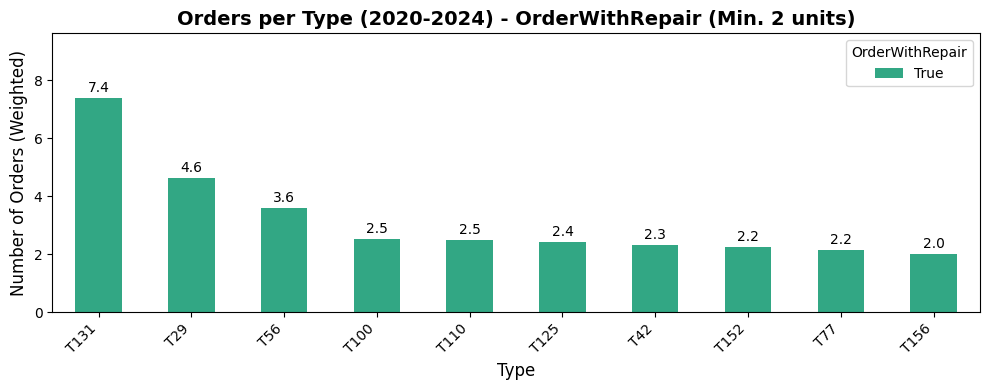

Details by Model Table:
+------+---------+--------------+-------+-------+
| Type | Subtype | Manufacturer | Model | Count |
+------+---------+--------------+-------+-------+
| T131 |   St4   |     F43      | T131  |  7.4  |
| T29  |   St4   |     F425     |  T29  |  4.6  |
| T56  |  St73   |     F32      |  T56  |  3.6  |
| T100 |  St200  |      F1      | T100  |  2.5  |
| T110 |  St317  |     F156     | T110  |  2.5  |
| T125 |  St252  |     F250     | T125  |  2.4  |
| T42  |  St53   |     F21      |  T42  |  2.3  |
| T152 |  St115  |     F53      | T152  |  2.2  |
| T77  |  St124  |     F78      |  T77  |  2.2  |
| T156 |   St4   |     F53      | T156  |  2.0  |
+------+---------+--------------+-------+-------+


In [47]:
a = f.analyze_orders_by_model(
    df_orders_ICOR[df_orders_ICOR["OrderWithRepair"] == 1], 
    df_equipment_without_deco, 
    model_col='Type', 
    Equipment_ID='Equipment_ID', 
    orderwithrepair_col='OrderWithRepair', 
    year_col='Year', 
    year_start=2020, 
    year_end=2024, 
    n_top=10,
    weighted=True
)


### 6.C Failure rate

The failure rate is defined as the percentage of equipment of the same type that has required at least one corrective repair in the last five years. The following key findings were identified:

**Failure Rate Calculation**  
Failure Rate (%) = (Number of Devices that needed a corrective repair / Total Devices from Manufacturer) * 100  

### Failure, Repair and Age Summary by Equipment Type

- **T125** had a 100% failure rate, with all units failing at least once.
- **T42** and **T56** show high failure rates and over 175 repairs each.
- **T29** had the highest number of repairs (439), despite a moderate failure rate.
- Most types are over 10 years old, especially **T42**, **T127**, and **T77**.
- **T131** and **T100** have the **highest average repair costs**, far above the rest.
- Some types, like **T96** and **T91**, are few in number but have **very high repair costs per unit**.

These types should be prioritized for review, replacement, or deeper cost-benefit analysis.



c:\Users\frano\Desktop\Practica DA\Swiss_PARA_MI\Final_Swiss\Power BI - Limpieza SAP\FailureAnalysis\FunctionsFailureAnallysis.py:985: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_equipment_top["Age"] = year_reference - df_equipment_top["Purchase_year"]
c:\Users\frano\Desktop\Practica DA\Swiss_PARA_MI\Final_Swiss\Power BI - Limpieza SAP\FailureAnalysis\FunctionsFailureAnallysis.py:1018: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(data=df_top_failure, x="Failure_Rate", y=manufacturer_col, palette="Reds_r")


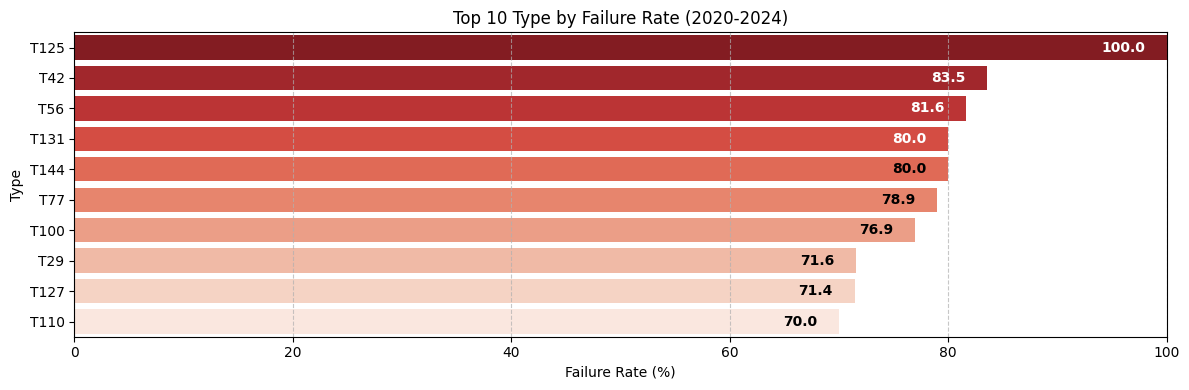

c:\Users\frano\Desktop\Practica DA\Swiss_PARA_MI\Final_Swiss\Power BI - Limpieza SAP\FailureAnalysis\FunctionsFailureAnallysis.py:1034: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(data=df_top_cost, x="Avg_Repair_Cost_Per_Device", y=manufacturer_col, palette="Blues_r")


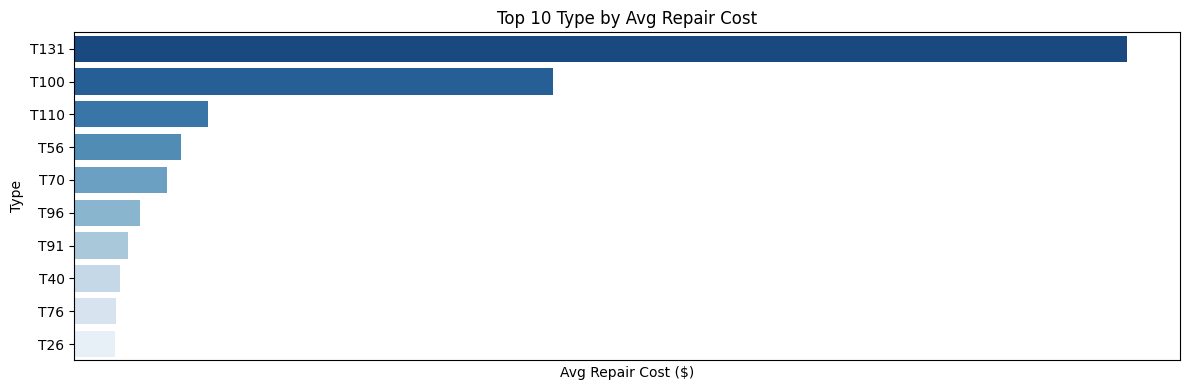

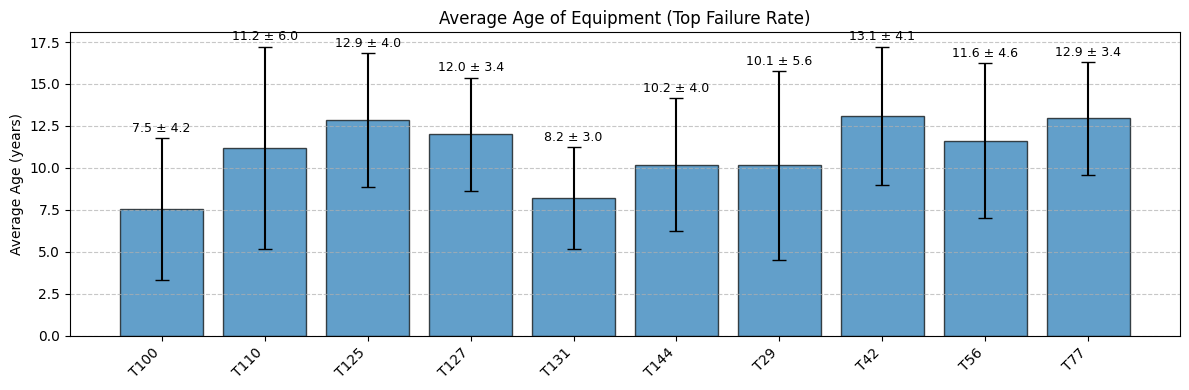

Failure, Cost and Age Summary Table:
+------+-----------------+--------------+---------------+--------+
| Type | Total_Equipment | Failure_Rate | Total_Repairs | AvgAge |
+------+-----------------+--------------+---------------+--------+
| T131 |        5        |     80.0     |      37       |  8.2   |
| T100 |       13        |     76.9     |      33       |  7.5   |
| T110 |       10        |     70.0     |      25       |  11.2  |
| T56  |       49        |     81.6     |      176      |  11.6  |
| T125 |        7        |    100.0     |      17       |  12.9  |
| T144 |        5        |     80.0     |       5       |  10.2  |
| T42  |       79        |     83.5     |      183      |  13.1  |
| T127 |        7        |     71.4     |       6       |  12.0  |
| T29  |       95        |     71.6     |      439      |  10.1  |
| T77  |       19        |     78.9     |      41       |  12.9  |
+------+-----------------+--------------+---------------+--------+


In [20]:
a = f.analyze_equipment_data(
    df_equipment_without_deco,
    df_orders,
    manufacturer_col="Type",
    cost_col="Cost",
    top_n=10,
    min_equipment=5,
    year_reference=2025,
    include_high_failure=True,
    high_failure_threshold=95,
    corr_offset = 1.4,
    min_lum = 0.6
)

## Part 6: Failure trend analysis by Model

The objective of this analysis is to identify which models of equipment have the highest failure rates and which generate the highest repair costs.

### 6.B Failure with repairs

In this section, we focus on identifying the specific models that have accumulated the highest number of repairs over the past five years. This analysis helps prioritize interventions on equipment that may require replacement, refurbishment, or further investigation.

- The model **M419** (Type **T56**, Manufacturer **F112**) stands out, averaging **more than one repair per unit per year**, indicating consistent operational challenges.  
- The models **M51** and **M381**, both from Type **T29** and **T56** respectively, also show elevated repair counts per unit, suggesting sustained maintenance demands.  
- Models such as **M406** and **M654** (both from Type **T29**) appear multiple times across manufacturers, which may indicate design-level or usage-related issues.  
- Other frequently repaired models include **M449** (T46), **M386** (T56), and **M446** (T35), all showing notable average repairs per unit.  
- Even though **M33** (T98) and **M332** (T15) show slightly lower counts, they remain among the top ten most frequently serviced models.

This data supports a targeted strategy to assess cost-effectiveness and reliability at the model level.

c:\Users\frano\Desktop\Practica DA\Swiss_PARA_MI\Final_Swiss\Power BI - Limpieza SAP\FailureAnalysis\FunctionsFailureAnallysis.py:244: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5299295774647887' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weighted_total[model] = weighted_total[model] / equip_counts[model]
c:\Users\frano\Desktop\Practica DA\Swiss_PARA_MI\Final_Swiss\Power BI - Limpieza SAP\FailureAnalysis\FunctionsFailureAnallysis.py:245: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5299295774647887' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  pivot_df.loc[model] = pivot_df.loc[model] / equip_counts[model]


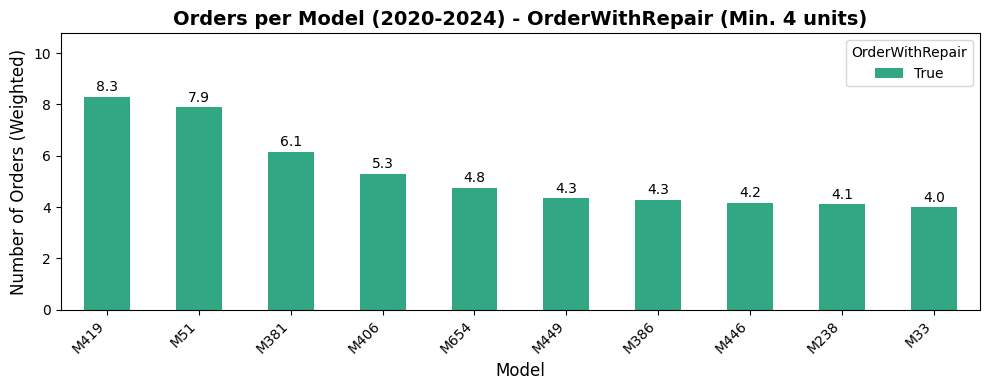

Details by Model Table:
+------+---------+--------------+-------+-------+
| Type | Subtype | Manufacturer | Model | Count |
+------+---------+--------------+-------+-------+
| T56  |  St73   |     F112     | M419  |  8.3  |
| T29  |   St4   |     F39      |  M51  |  7.9  |
| T56  |  St73   |     F64      | M381  |  6.1  |
| T29  |   St4   |     F155     | M406  |  5.3  |
| T29  |   St4   |     F39      | M654  |  4.8  |
| T46  |  St40   |     F15      | M449  |  4.3  |
| T56  |  St73   |     F64      | M386  |  4.3  |
| T35  |  St60   |     F32      | M446  |  4.2  |
| T42  |  St39   |     F21      | M238  |  4.1  |
| T98  |  St89   |      F7      |  M33  |  4.0  |
+------+---------+--------------+-------+-------+


In [49]:
Models = f.analyze_orders_by_model(
    df_orders_ICOR[df_orders_ICOR["OrderWithRepair"] == 1], 
    df_equipment_without_deco, 
    model_col='Model', 
    Equipment_ID='Equipment_ID', 
    orderwithrepair_col='OrderWithRepair', 
    year_col='Year', 
    year_start=2020, 
    year_end=2024, 
    min_equip_count=4,
    n_top=10,
    weighted=True
)


In [50]:
Models_lista = Models.index.tolist()
print(Models_lista)


['M419', 'M51', 'M381', 'M406', 'M654', 'M449', 'M386', 'M446', 'M238', 'M33']


### 6.C Failure rate

The failure rate is defined as the percentage of equipment of the same type that has required at least one corrective repair in the last five years. The following key findings were identified:

>**Failure Rate Calculation**  
>Failure Rate (%) = (Number of Devices that needed a corrective repair / Total Devices from Manufacturer) * 100  

- **Several models show high repair costs and 100% failure rates**, including **M446**, **M381**, **M386**, **M408**, and **M449**, indicating consistent issues across all units.
- Many of these high-cost models, like **M386** (16.6 years), **M449** (17.0), and **M159** (16.8), also have **very high average ages**, suggesting age as a contributing factor.
- In contrast, models like **M303** (7.4 years), **M314** (7.0), and **M195** (13.0) show **high failure or repair counts despite their relatively younger age**, which may point to design or usage issues.
- The **M51** model stands out with **398 total repairs**, the highest across all models, and a 98% failure rate, indicating a major maintenance burden despite moderate costs.
- Models such as **M446**, **M419**, and **M381** appear consistently across both the **top failure/cost tables and repair count charts**, reinforcing their critical status.
- There are **multiple entries from the same types** (e.g., **T35**, **T29**, **T56**), suggesting certain types are more prone to high-cost or high-frequency failures across different models.
- High repair cost does not always correlate with equipment age—**M381** and **M419** are both costly to maintain and not necessarily the oldest, highlighting models that might need early replacement.

Overall, the convergence of **high failure rates**, **frequent repairs**, and **elevated costs** in specific models supports the case for **targeted replacement or technical review**.



c:\Users\frano\Desktop\Practica DA\Swiss_PARA_MI\Final_Swiss\Power BI - Limpieza SAP\FailureAnalysis\FunctionsFailureAnallysis.py:981: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_equipment_top["Age"] = year_reference - df_equipment_top["Purchase_year"]
c:\Users\frano\Desktop\Practica DA\Swiss_PARA_MI\Final_Swiss\Power BI - Limpieza SAP\FailureAnalysis\FunctionsFailureAnallysis.py:1014: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(data=df_top_failure, x="Failure_Rate", y=manufacturer_col, palette="Reds_r")


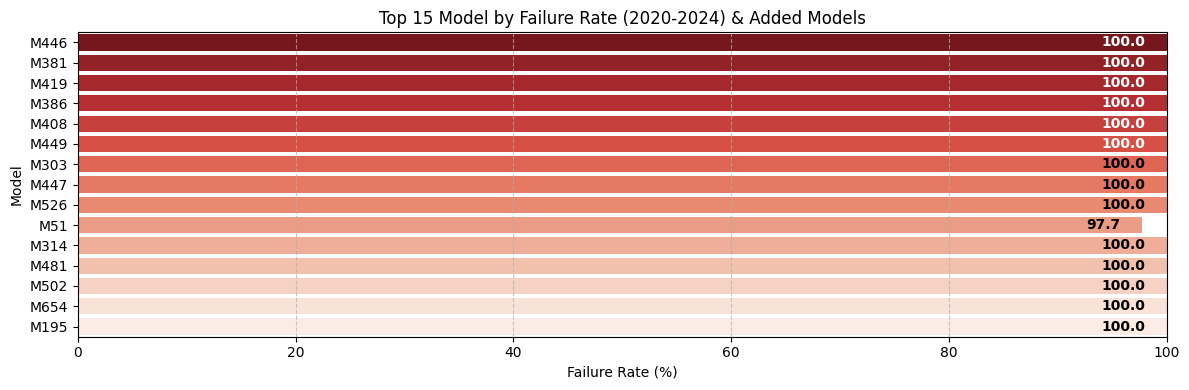

c:\Users\frano\Desktop\Practica DA\Swiss_PARA_MI\Final_Swiss\Power BI - Limpieza SAP\FailureAnalysis\FunctionsFailureAnallysis.py:1030: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(data=df_top_cost, x="Avg_Repair_Cost_Per_Device", y=manufacturer_col, palette="Blues_r")


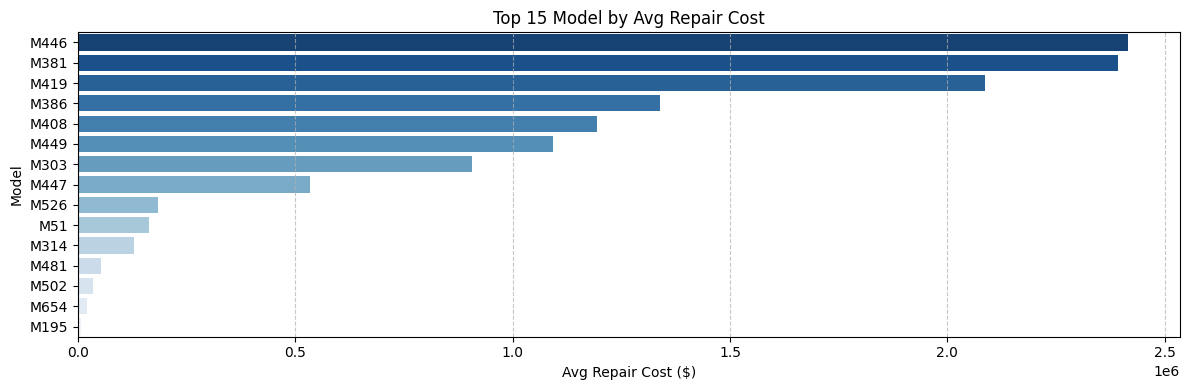

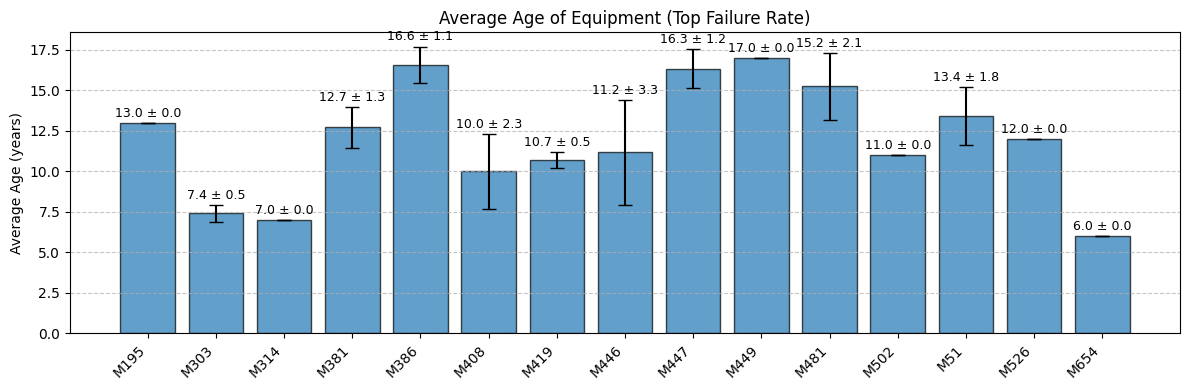

Failure, Cost and Age Summary Table:
+------+--------------+-------+-----------------+--------------+---------------+--------+
| Type | Manufacturer | Model | Total_Equipment | Failure_Rate | Total_Repairs | AvgAge |
+------+--------------+-------+-----------------+--------------+---------------+--------+
| T35  |     F32      | M446  |        6        |    100.0     |      25       |  11.2  |
| T56  |     F64      | M381  |        7        |    100.0     |      43       |  12.7  |
| T56  |     F112     | M419  |        7        |    100.0     |      58       |  10.7  |
| T56  |     F64      | M386  |        7        |    100.0     |      30       |  16.6  |
| T19  |     F132     | M408  |        7        |    100.0     |      22       |  10.0  |
| T46  |     F15      | M449  |        6        |    100.0     |      26       |  17.0  |
| T91  |     F15      | M303  |       10        |    100.0     |      25       |  7.4   |
| T46  |      F8      | M447  |        6        |    100.0     

In [54]:
a = f.analyze_equipment_data(
    df_equipment_without_deco,
    df_orders,
    manufacturer_col="Model",
    cost_col="Cost",
    top_n=15,
    min_equipment=4,
    Add=Models_lista,
    year_reference=2025,
    include_high_failure=True,
    high_failure_threshold=95,
    min_lum = 0.88,
    corr_offset = 0.1
)

### Models with Repair Expenses Exceeding Initial Purchase Cost

This analysis identifies models where the **total repair cost has surpassed the original purchase cost** of the equipment. The calculation used is:

> **Total Repair Cost per Model / (Average Purchase Cost × Number of Units)**

- The **M107** model is the most striking case, with **293.6%** of its purchase cost already spent on repairs. This suggests that the model may no longer be cost-effective to maintain.  
- Other models with significant overages include **M269**, **M554**, **M195**, and **M446**, all exceeding **75%** of their original value in accumulated repair expenses.  
- While **M303** does not surpass 100%, it still reached **65.1%**, making it another model to monitor closely.  
- These findings suggest that replacement or reevaluation of these models could lead to **long-term cost savings** and improved equipment reliability.

Prioritizing these high-expense models for replacement or contract renegotiation could significantly reduce operational costs.


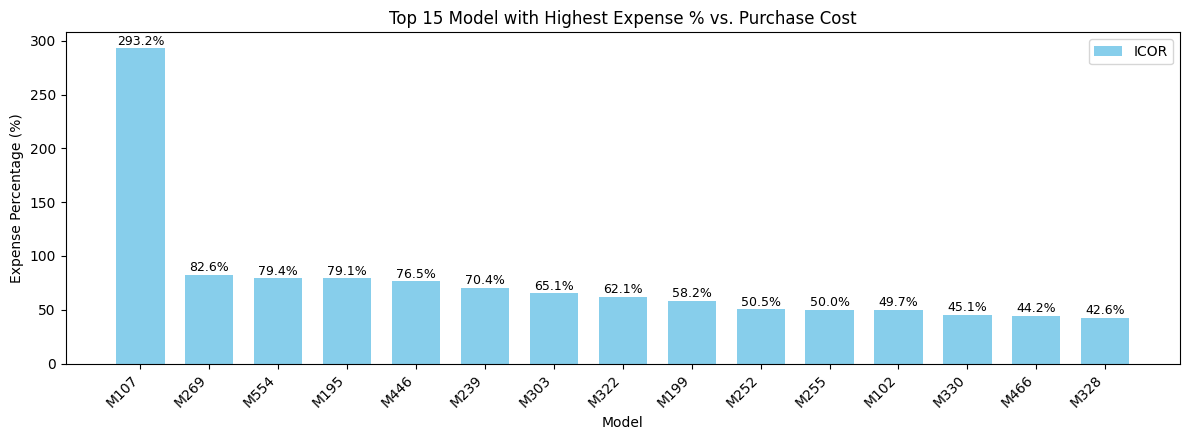


Final Table:
+--------+----------------+---------+---------------+-----------+---------+
| Type   | Manufacturer   | Model   |   N_equipment |   Repairs |   Ratio |
|--------+----------------+---------+---------------+-----------+---------|
| T52    | F157           | M107    |        15     |        58 |   293.2 |
| T52    | F80            | M107    |        15     |        58 |   293.2 |
| T59    | F18            | M269    |        11     |        34 |    82.6 |
| T24    | F77            | M554    |        5      |        26 |    79.4 |
| T2     | F125           | M195    |        14     |       161 |    79.1 |
| T35    | F32            | M446    |        6      |       109 |    76.5 |
| T8     | F76            | M239    |        7      |         7 |    70.4 |
| T91    | F15            | M303    |        10     |        81 |    65.1 |
| T66    | F18            | M322    |        7      |         5 |    62.1 |
| T43    | F18            | M199    |        9      |        32 |    58.2 

In [52]:
a = f.plot_top_expense_percentage_vs_purchase_cost(
    df_equipment_without_deco,
    df_orders, 
    category = "Model",
    top_n=15, 
    min_equipment=5, 
    order_type="ICOR",
    min_purchase_value=0
)